### YOLO 
- We need object detecion(localization) and classification, that's why we need YOLO not a simple Image Classigication CNN. We will need to compute a velocity and direction of the object ( bump, jump, turn) in order to predict the optimal suspension settings.
- You only look once. One forward propagation -> Speed. Speed is vital in real-time applications.
- Its lightness as a solution and speed of processing is what stands out in comparison to other object detection algorithms as R-CNN or SSD.

- IOU - Intesection over union = intersect area / union area ( also called non-max suppression)


### Brief Introduction Object Detection

1. Difference between Object Classification, Object Detection and Object Recognition


    - Object Classification: Classify the object in the image - input is a image and output is a class label
    - Object Detection: Detect the object in the image - input is a image and output is a bounding box (x, y, w, h) and a class label
    - Object Segmentation: Type of image recognition that identifies and separate the distinct objects in an image on a pixel level (exact shape)

2. Brief History

    - In the begining Edge Detection techniques were used to detect the object in the image ( Sobel, Canny, Laplacian, etc.)
    - First Object Detection Algorithm: Viola Jones (2001)
        - Using sliding windows for detecting Haar Features 
    - Histrogram of Oriented Gradients (HOG) (2005)
        - Extracting the gradient and orientation of the edges, mostly used to detec humans
    - Deep Learning (2012) ( CNN's) Alex Net, but it was Classification oriented not Detection
    - RCNN ( Regions with Convolutional Neural Networks) (2014)
        - Selective Search Algorithm to extract the regions of interest and then classify them using CNN
        - It was slow and not real time, than Fast RCNN and Faster - RCNN was introduced
        
    - **YOLO** ( You Only Look Once) (2015) - Real time
    - Supervised ML model
    - Single pass to predict, while RCNN needs multiple iterrations one after another 
    
3. Evaluation

- How good is the location:
    - IoU - Intersection over Union (how close the predicted bounding box is to the ground truth bounding box) (value between 0-1)

- How good is the classification
    - mAP - mean Average Precision
    - AP - Average Precision ( confusion matrix, precssion and recall )
        - Precision - Actual Positives out of total positive predictions ( True Positive / ( True Postives + False Postives))
        - Recall - Actual positives out of all predictions ( True Postives / (True Postives + False Negatives)) 
        - Area under the Recall-Precision Curve 



#### YOLO Testing and Experimentation

In [2]:
from ultralytics import YOLO
import cv2
import cvzone
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
model = YOLO('yolov8n.pt')
results = model('images/1.jpg', stream=True)
cv2.waitKey(0)

-1

In [2]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

### YOLO with WebCam

In [10]:
cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)

model = YOLO('yolov8n.pt')

while True:
    success, img = cap.read()
    if not success:
        print("Failed to capture image")
        break

    results = model(img, stream=True)
    
    for r in results:
        boxes = r.boxes
        for box in boxes:
                # Bounding Box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                bbox = (x1, y1, w, h)
                # cv2.rectangle(image, (x1, y1), (x2, y2), (150, 0, 255), 1)
                cvzone.cornerRect(img, (bbox), 20, rt = 2)
                # Confidence
                conf = math.ceil((box.conf[0] * 100))/100
                cvzone.putTextRect(img, f'{conf}', (max(0, x1), max(35, y1)), 1, 1)

                # Class Name
                cls = int(box.cls[0])
                cvzone.putTextRect(img, f'{classNames[cls]}', (max(0, x1 + 50), max(35, y1)), scale=1, thickness=1)

    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # break the loop on 'q' key press
        break

cap.release()
cv2.destroyAllWindows()




0: 384x640 2 persons, 154.1ms
Speed: 3.1ms preprocess, 154.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 363.0ms
Speed: 6.7ms preprocess, 363.0ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 228.0ms
Speed: 5.0ms preprocess, 228.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 persons, 177.4ms
Speed: 5.6ms preprocess, 177.4ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 143.0ms
Speed: 2.5ms preprocess, 143.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 137.5ms
Speed: 4.4ms preprocess, 137.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 144.9ms
Speed: 3.4ms preprocess, 144.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 persons, 132.9ms
Speed: 5.0ms preprocess, 132.9ms inference, 2.9ms postprocess per 

In [ ]:

# Capture a single frame
ret, frame = cap.read()  
# Save the frame to a file
if ret:
    cv2.imwrite('frame.png', frame)

cap.release()

In [95]:
image = cv2.imread('1.png')
results = model(image, show = False)


0: 384x640 6 persons, 2 buss, 2 backpacks, 1 handbag, 198.3ms
Speed: 7.0ms preprocess, 198.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


In [96]:
for r in results:
        boxes = r.boxes
        for box in boxes:
                # Bounding Box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                bbox = (x1, y1, w, h)
                # cv2.rectangle(image, (x1, y1), (x2, y2), (150, 0, 255), 1)
                cvzone.cornerRect(image, (bbox), 20, rt = 2)
                # Confidence
                conf = math.ceil((box.conf[0] * 100))/100
                cvzone.putTextRect(image, f'{conf}', (max(0, x1), max(35, y1)), 1, 1)

                # Class Name
                cls = int(box.cls[0])
                cvzone.putTextRect(image, f'{classNames[cls]}', (max(0, x1 + 50), max(35, y1)), scale=1, thickness=1)

cv2.imshow("Image", image)
cv2.waitKey(0)

-1

### Training YOLO on Custom Dataset in Google Colab using GPU
- Construction_safety dataset: Train, Valid, Test images and labels

    - **Training set**: This is the largest set and is what we use to train our model. The model learns from these examples.

    - **Validation set**: This is used to validate the results from the training process. After each epoch (or a certain number of iterations) of training, the model's performance is evaluated on the validation set. This helps monitor the model's learning progress and can also be useful to tune hyperparameters, choose the best version of the model, and prevent overfitting. If a model performs well on the training set but poorly on the validation set, it may be overfitting to the training data.

    - **Test set**: The test set is used only once, after the model has been completely trained. This set is used to get an unbiased evaluation of the final model, to assess how well the model generalizes to unseen data.

![Alt](COLABtrain0.png)
![Alt](COLABtrain1.png)

- ### Results: 


In [1]:
# code from Colab for training 

from ultralytics import YOLO
!yolo task=detect mode=train model=yolov8l.pt data=../content/drive/MyDrive/Colab_Notebooks/YOLO/Construction_Safety/data.yaml epochs=50 imgsz=640

In [14]:
# We are downloading the weights (best.pt) from the colab and saving it in the local directory

cap = cv2.VideoCapture("ppe-1.mp4")
model = YOLO('best.pt')

classNames = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

MyColor = (0, 0, 255)

while True:
    success, img = cap.read()
    if not success:
        print("Failed to capture image")
        break

    results = model(img, stream=True)
    
    for r in results:
        boxes = r.boxes
        for box in boxes:
                # Bounding Box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                bbox = (x1, y1, w, h)
                # cv2.rectangle(image, (x1, y1), (x2, y2), (150, 0, 255), 1)
                cvzone.cornerRect(img, (bbox), 20, rt = 2)
                

                # Confidence
                conf = math.ceil((box.conf[0] * 100))/100
            
                # Class Name
                cls = int(box.cls[0])
                currentClass = classNames[cls]

                if conf > 0.5:

                    if currentClass == 'Hardhat' or currentClass == 'Mask' or currentClass == 'Safety Vest':
                        MyColor = (0, 255, 0)
                    elif currentClass == 'NO-Hardhat' or currentClass == 'NO-Mask' or currentClass == 'NO-Safety Vest':
                        MyColor = (0, 0, 255)
                    else :
                        MyColor = (255, 0, 0)

                cv2.rectangle(img, (x1, y1), (x2, y2), MyColor, 3)
                cvzone.putTextRect(img, f'{classNames[cls]} {conf}', (max(0, x1 + 50), max(35, y1)), scale=0.8, thickness=1, colorB=MyColor, colorT= (255, 255, 255), colorR=MyColor, offset=5)

                

    cv2.imshow("Image", img)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # break the loop on 'q' key press
        break

cap.release()
cv2.destroyAllWindows()




0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 1679.8ms
Speed: 6.7ms preprocess, 1679.8ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Hardhat, 1 NO-Mask, 1 Person, 1 Safety Vest, 4583.0ms
Speed: 9.1ms preprocess, 4583.0ms inference, 9.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 5511.0ms
Speed: 13.7ms preprocess, 5511.0ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 5771.3ms
Speed: 12.7ms preprocess, 5771.3ms inference, 14.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 4417.7ms
Speed: 15.6ms preprocess, 4417.7ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 1 Safety Vest, 3801.3ms
Speed: 11.2ms preproc

### Preparation of Custom Dataset for MTB Trail Detection

- Selecting usefull frames from GoPro video
- Labeling the images using LabelImg software and auto

- After the assesment that typical object detection model like **YOLO** might not be the best choice for this problem because there aren't clear, discrete objects to detect.
- Considering the possibility of using **Semantic Segmentation** instead of Object Detection

- ### Would Action recognition be a better choice for this problem ??? 

In [20]:
# code from Colab for training 
# Here we have probles with duplciation run of a library but in Colab the training went fine

from ultralytics import YOLO
!yolo task=detect mode=train model='yolov8l.pt' data=../MTB_dataset/data.yaml epochs=10 imgsz=700

![image.jpg](results.jpg)

In [45]:
# We are downloading the weights (bestmb.pt) from the colab and saving it in the local directory

cap = cv2.VideoCapture("output_cropped.mp4")
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create a VideoWriter object
out = cv2.VideoWriter('output_with_detections.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 20.0, (frame_width, frame_height))

model = YOLO('bestmb.pt')

classNames = ['turn', 'jump']

MyColor = (0, 0, 255)

# img = cv2.imread('../MTB_dataset/test/images/2023-06-08 10_45_19-(190) DARKFEST 2020- WORLDS BIGGEST MTB JUMPS WITH NICO VINK - YouTube.jpg')

while True:

    success, img = cap.read()
    if not success:
        print("Failed to capture image")
        break



    results = model(img, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
                
                # Confidence
                conf = math.ceil((box.conf[0] * 100))/100

                if conf > 0.92:
                    # Bounding Box
                    x1, y1, x2, y2 = box.xyxy[0]
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                    w, h = x2 - x1, y2 - y1
                    bbox = (x1, y1, w, h)
                    # cv2.rectangle(image, (x1, y1), (x2, y2), (150, 0, 255), 1)
                    cvzone.cornerRect(img, (bbox), 20, rt = 2)
                    

                
                    # Class Name
                    cls = int(box.cls[0])
                    currentClass = classNames[cls]

                    # if conf > 0.5:

                    #     if currentClass == 'Hardhat' or currentClass == 'Mask' or currentClass == 'Safety Vest':
                    #         MyColor = (0, 255, 0)
                    #     elif currentClass == 'NO-Hardhat' or currentClass == 'NO-Mask' or currentClass == 'NO-Safety Vest':
                    #         MyColor = (0, 0, 255)
                    #     else :
                    #         MyColor = (255, 0, 0)

                    cvzone.putTextRect(img, f'{classNames[cls]} {conf}', (max(0, x1 + 50), max(35, y1)), scale=0.8, thickness=1, colorB=MyColor, colorT= (255, 255, 255), colorR=MyColor, offset=5)
                    # cv2.rectangle(img, (x1, y1), (x2, y2), MyColor, 3)

    out.write(img)  # Write out the frame to the new video file

    # cv2.imshow("Image", img)
    # if cv2.waitKey(1) & 0xFF == ord('q'):  # break the loop on 'q' key press
        # break

cap.release()
out.release()
cv2.destroyAllWindows()




0: 416x704 7 jumps, 1 turn, 1319.6ms
Speed: 4.7ms preprocess, 1319.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

0: 416x704 4 jumps, 1 turn, 1200.6ms
Speed: 5.7ms preprocess, 1200.6ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

0: 416x704 5 jumps, 2 turns, 1151.6ms
Speed: 4.9ms preprocess, 1151.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

0: 416x704 4 jumps, 2 turns, 1122.9ms
Speed: 4.1ms preprocess, 1122.9ms inference, 2.0ms postprocess per image at shape (1, 3, 704, 704)

0: 416x704 3 jumps, 1 turn, 1158.5ms
Speed: 4.3ms preprocess, 1158.5ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

0: 416x704 3 jumps, 2 turns, 1234.3ms
Speed: 4.5ms preprocess, 1234.3ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

0: 416x704 4 jumps, 4 turns, 1105.6ms
Speed: 5.4ms preprocess, 1105.6ms inference, 1.0ms postprocess per image at shape (1, 3, 704, 704)

0: 416x704 2 jumps, 4 turns, 1206.3m

Failed to capture image


#### Results:
- 
![image.png](2023-06-08%2011_02_04-Image.jpg)

##### FREE YOUTUBE DOWNLOADER: https://youtube4kdownloader.com/download/clip/https%253A%252F%252Fwww.youtube.com%252Fwatch%253Fv%253DA0VUasvVHlQ

In [12]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

# Specify the start and end times in seconds
start_time = 2*60 + 15
end_time = 2*60 + 22

# Specify the video file path
video_file_path = r"C:\Users\dimit\Downloads\DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!!.mp4"

# Specify the output file name
output_file_path = "output_cropped.mp4"

# Extract the subclip
ffmpeg_extract_subclip(video_file_path, start_time, end_time, targetname=output_file_path)


Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


### Let's try giving a mask (region of interest) to YOLO

- For launching a big jump always we have a straight section before to preload the suspension and optimize the body position
- We can use a mask to crop the image and give it to YOLO to detect the jump

In [4]:
def region_of_interest(image, region):
    height = image.shape[0]
    mask = np.zeros_like(image) # mask with black pixels matching the dimensions of the image
    cv2.fillPoly(mask, region, 255) # fill the triangle with white pixels
    return mask

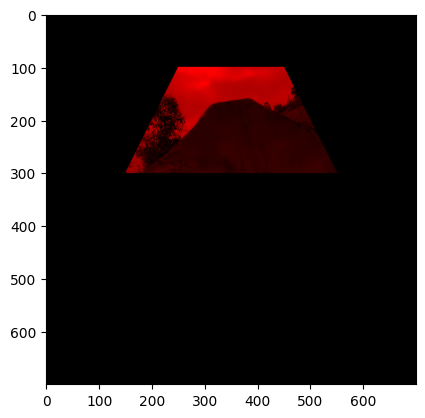

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../MTB_dataset/test/images/2023-06-08 10_45_19-(190) DARKFEST 2020- WORLDS BIGGEST MTB JUMPS WITH NICO VINK - YouTube.jpg')
img = cv2.resize(img, (700, 700))

region = np.array([[(150, 300), (550, 300), (450, 100), (250, 100)]])
mask = region_of_interest(img, region)

plt.imshow(mask)

masked_image = cv2.bitwise_and(img, region_of_interest(img, region))
plt.imshow(masked_image, cmap='gray')


In [5]:


model = YOLO('bestmb.pt')

classNames = ['turn', 'jump']

MyColor = (0, 0, 255)

img = cv2.imread('../MTB_dataset/test/images/2023-06-08 10_45_19-(190) DARKFEST 2020- WORLDS BIGGEST MTB JUMPS WITH NICO VINK - YouTube.jpg')
img = cv2.resize(img, (700, 700))
region = np.array([[(150, 300), (550, 300), (450, 100), (250, 100)]])
masked_image = cv2.bitwise_and(img, region_of_interest(img, region))
plt.imshow(masked_image, cmap='gray')

results = model(masked_image, stream=True)

for r in results:
    boxes = r.boxes
    for box in boxes:
            
            # Confidence
            conf = math.ceil((box.conf[0] * 100))/100

            if conf > 0.975:
                # Bounding Box
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                w, h = x2 - x1, y2 - y1
                bbox = (x1, y1, w, h)
                # cv2.rectangle(image, (x1, y1), (x2, y2), (150, 0, 255), 1)
                cvzone.cornerRect(img, (bbox), 20, rt = 2)
                

            
                # Class Name
                cls = int(box.cls[0])
                currentClass = classNames[cls]

                # if conf > 0.5:

                #     if currentClass == 'Hardhat' or currentClass == 'Mask' or currentClass == 'Safety Vest':
                #         MyColor = (0, 255, 0)
                #     elif currentClass == 'NO-Hardhat' or currentClass == 'NO-Mask' or currentClass == 'NO-Safety Vest':
                #         MyColor = (0, 0, 255)
                #     else :
                #         MyColor = (255, 0, 0)

                cvzone.putTextRect(img, f'{classNames[cls]} {conf}', (max(0, x1 + 50), max(35, y1)), scale=0.8, thickness=1, colorB=MyColor, colorT= (255, 255, 255), colorR=MyColor, offset=5)
                # cv2.rectangle(img, (x1, y1), (x2, y2), MyColor, 3)


cv2.imshow("Image", img)
while True:
    if cv2.waitKey(0) & 0xFF == ord('q'):  # break the loop on 'q' key press
        break

cv2.destroyAllWindows()




0: 704x704 5 jumps, 20 turns, 2065.8ms
Speed: 9.2ms preprocess, 2065.8ms inference, 5.3ms postprocess per image at shape (1, 3, 704, 704)


: 

: 

![image.png](12.jpg)